1. Проверив некоторые комбинации по кол-ву итераций и скорости обучения, сразу видно, что стохастический градиентый спуск всегда выдает меньше ошибку, чем обычный. Хотя бывают результаты, что стохастический дает ошибку = 1000, когда обычный спуск около 7000 - это странно: либо я что-то неправильно настроил, либо модель непредсказуемая. При этом make regression так же очень сильно влияет на результаты модели и с 100 признаками уже значительно растет ошибка.


2. Так же видно, что обычный градиентый спуск очень сильно привязан к локальным минимумам - почти всегда обрывается на 4-й итераци, в то время как стохастический идет дальше. Но опять же, он может на n-итерации показать ошибку = 20000 - это вообще реально? Такое ощущение, что я работаю с черным квадратом, в котором надо погдонять параметры.


2. Честно, я не увидел большой разницы от использования L2 регулизации. В примере ниже она показывает рез-т хуже, чем без нее

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [249]:
def plot_fit_history(weights_history_gd: np.array,
                     errors_history_gd: np.array,
                     weights_history_sgd: np.array,
                     errors_history_sgd: np.array,
                     figsize = (15, 5)) -> None:
    
    fig = plt.figure(figsize=(15, 5)) 
    plt.suptitle(
        f"Optional iterations with regular gradient descent: {len(errors_history_gd)}, Error = {round(errors_history_gd[-1], 2)}\n"
        f"Optional iterations with stochastic gradient descent: {len(errors_history_sgd)}, Error = {round(errors_history_sgd[-1], 2)}",
    size = 15)
    
    
    plt.subplot(121)
    plt.plot(range(len(errors_history_gd)), errors_history_gd , linewidth=10, color='b')
    plt.plot(range(len(errors_history_sgd)), errors_history_sgd , linewidth=3, color='r')
    plt.xlabel('n_iterations', size=15)
    plt.ylabel('MSE', size=15)
    
    plt.subplot(122)
    plt.plot(range(len(weights_history_gd)), weights_history_gd, linewidth=10, color='b')
    plt.plot(range(len(weights_history_sgd)), weights_history_sgd, linewidth=3, color='r')
    plt.xlabel('n_iterations', size=15)
    plt.ylabel('w', size=15)


In [258]:
X,y = make_regression(n_samples = 10000,
                      n_features = 1000,
                      n_informative=1,
                      noise=10,
                      random_state=0)

In [259]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def fit_linear_model(X: np.array,
                     y: np.array,
                     learning_rate = 1e-2,
                     iterations: int = 100000,
                     tol: float = 1e-5):
    
    weights = np.random.randn(X.shape[1])
    errors_history_gd, weights_history_gd = [], [weights]
    errors_history_sgd, weights_history_sgd = [], [weights]

#     gradient_descent
    for n_iter in range(iterations):
        y_pred = np.dot(X, weights)
        current_error_gd = calc_mse(y, y_pred)
        weights_gd = weights.copy()
        weights_gd -= learning_rate * (1 / X.shape[1] * 2 * np.dot(X.T, (y_pred - y)))

        errors_history_gd.append(current_error_gd)
        weights_history_gd.append(weights_gd)
        
        if n_iter > 2 and np.abs(current_error_gd - errors_history_gd[-2]) < tol:
            break
    
#     stohastic_gradient_descent
    for n_iter in range(1, iterations+1):
        idx = np.random.randint(0, len(y))
        X_i = X[idx]
        y_i = y[idx]
        y_pred_i = np.dot(weights, X_i)
        current_error_sgd = calc_mse(y_i, y_pred_i)
        weights_sgd = weights.copy()
        weights_sgd -= learning_rate * (1 / X.shape[1] * 2 * np.dot( (y_pred_i - y_i), X_i.T))

        errors_history_sgd.append(current_error_sgd)
        weights_history_sgd.append(weights_sgd)
        
        if n_iter > 2 and np.abs(current_error_sgd - errors_history_sgd[-2]) < tol:
            break
            
    return weights_history_gd, errors_history_gd, weights_history_sgd, errors_history_sgd



In [260]:
weights_history_gd, errors_history_gd, weights_history_sgd, errors_history_sgd = fit_linear_model(X, y)

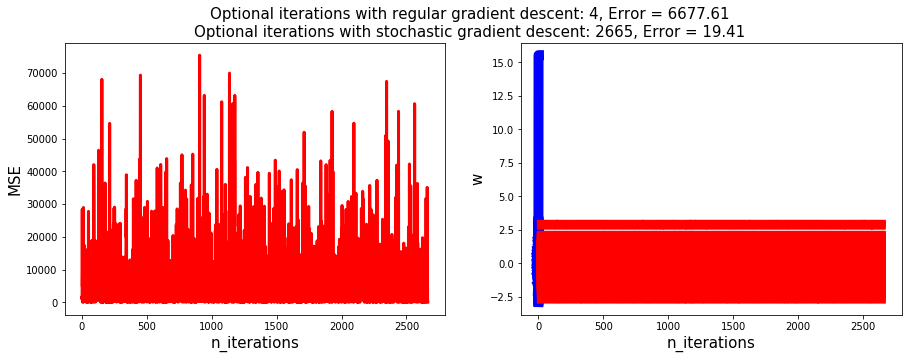

In [261]:
plot_fit_history(weights_history_gd, errors_history_gd, weights_history_sgd, errors_history_sgd)

In [265]:
def fit_linear_model_L2(X: np.array,
                     y: np.array,
                     learning_rate = 1e-2,
                     iterations: int = 100000,
                     lambda_: float = 1e-8,
                     tol: float = 1e-5):
    
    weights = np.random.randn(X.shape[1])
    errors_history_gd, weights_history_gd = [], [weights]
    errors_history_sgd, weights_history_sgd = [], [weights]

#     gradient_descent
    for n_iter in range(iterations):
        y_pred = np.dot(X, weights)
        current_error_gd = calc_mse(y, y_pred)
        weights_gd = weights.copy()
        weights_gd -= learning_rate * (1 / X.shape[1] * 2 * np.dot(X.T, (y_pred - y)) + lambda_ * weights_gd)

        errors_history_gd.append(current_error_gd)
        weights_history_gd.append(weights_gd)
        
        if n_iter > 2 and np.abs(current_error_gd - errors_history_gd[-2]) < tol:
            break
    
#     stohastic_gradient_descent
    for n_iter in range(1, iterations+1):
        idx = np.random.randint(0, len(y))
        X_i = X[idx]
        y_i = y[idx]
        y_pred_i = np.dot(weights, X_i)
        current_error_sgd = calc_mse(y_i, y_pred_i)
        weights_sgd = weights.copy()
        weights_sgd -= learning_rate * (1 / X.shape[1] * 2 * np.dot( (y_pred_i - y_i), X_i.T) + lambda_ * weights_sgd) 

        errors_history_sgd.append(current_error_sgd)
        weights_history_sgd.append(weights_sgd)
        
        if n_iter > 2 and np.abs(current_error_sgd - errors_history_sgd[-2]) < tol:
            break
            
    return weights_history_gd, errors_history_gd, weights_history_sgd, errors_history_sgd

In [266]:
weights_history_gd, errors_history_gd, weights_history_sgd, errors_history_sgd = fit_linear_model_L2(X, y)

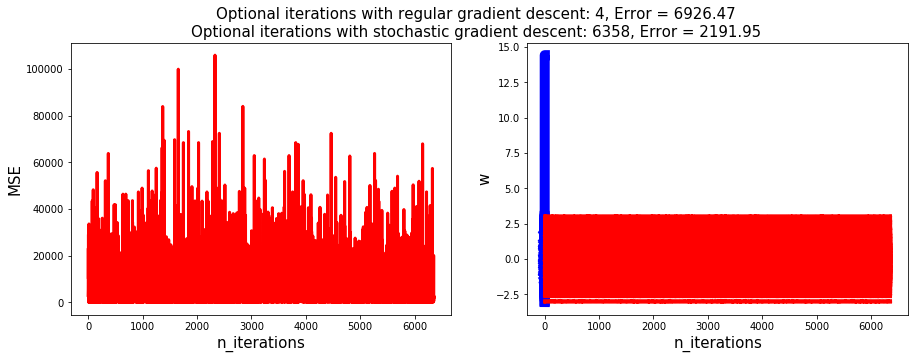

In [267]:
plot_fit_history(weights_history_gd, errors_history_gd, weights_history_sgd, errors_history_sgd)